https://github.com/GorkemKola/Bitcoin-Price-Prediction/blob/main/BitcoinPricePrediction/BitcoinPricePrediction.ipynb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

### **Loading data**

In [ ]:
url = 'https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/saved_data.csv?token=GHSAT0AAAAAACDMXZVAWDXIRKRBMZKLKBA2ZD3GW3A'
df = pd.read_csv(url, sep = ',')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df = df.sort_values('Date').reset_index().drop(columns = 'index')

In [ ]:
df.head()

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,2010-07-20,0.1,0.1,0.1,0.1,0.26,936.0,182.0,1090.745856,789700.0,...,0.0,0.0,0.0,0.0,1191.7,17.693,0.00,1083.48,10229.96,9300.46
1,2010-07-21,0.1,0.1,0.1,0.1,0.58,784.0,182.0,603.821256,499964.0,...,0.0,0.0,0.0,0.0,1191.8,17.803,0.00,1069.59,10120.53,9278.83
2,2010-07-22,0.1,0.1,0.1,0.1,2.16,594.0,182.0,572.443182,403000.0,...,0.0,0.0,0.0,0.0,1195.6,18.120,7002.75,1093.67,10322.30,9220.88
3,2010-07-23,0.1,0.1,0.1,0.1,2.40,655.0,182.0,530.932990,412004.0,...,0.0,0.0,0.0,0.0,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4,2010-07-24,0.1,0.1,0.1,0.1,0.50,959.0,182.0,1519.539683,1148772.0,...,0.0,0.0,0.0,0.0,1187.8,18.101,7018.25,1102.66,10424.62,9430.96


**Đối tượng dự báo: BTC_close**




In [ ]:
# show information of dataframe
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        4654 non-null   datetime64[ns]
 1   BTC_close                   4654 non-null   float64       
 2   BTC_open                    4654 non-null   float64       
 3   BTC_high                    4654 non-null   float64       
 4   BTC_low                     4654 non-null   float64       
 5   BTC_volume                  4654 non-null   float64       
 6   Active_Addr_Cnt             4654 non-null   float64       
 7   Difficulty                  4654 non-null   float64       
 8   Mean_Block_Size(in_bytes)   4654 non-null   float64       
 9   Sum_Block_Weight            4654 non-null   float64       
 10  Total_Fees(USD)             4654 non-null   float64       
 11  Mean_Hashrate               4654 non-null   float64     

None

In [ ]:
# Showing the sum of null values at columns in our data.
df.isnull().sum()

Date                          0
BTC_close                     0
BTC_open                      0
BTC_high                      0
BTC_low                       0
BTC_volume                    0
Active_Addr_Cnt               0
Difficulty                    0
Mean_Block_Size(in_bytes)     0
Sum_Block_Weight              0
Total_Fees(USD)               0
Mean_Hashrate                 0
Xfer_Cnt                      0
Mean_Tx_size(native_units)    0
ETH                           0
LTC                           0
DOGE                          0
XRP                           0
GOLD                          0
SILVER                        0
COPPER                        0
S&P500                        0
DJI                           0
JP225                         0
dtype: int64

### **correlation**

In [ ]:
df.corr()

<ipython-input-50-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
BTC_close,1.000000,0.998992,0.999551,0.999461,0.141763,0.695928,0.757719,0.628616,0.470883,0.468933,...,0.948835,0.830869,0.820463,0.783344,0.617267,0.071541,0.548912,0.859933,0.824369,0.759547
BTC_open,0.998992,1.000000,0.999579,0.999220,0.142468,0.695462,0.757910,0.628324,0.470370,0.468605,...,0.949134,0.830374,0.821658,0.783573,0.617077,0.071444,0.549640,0.859819,0.824246,0.759429
BTC_high,0.999551,0.999579,1.000000,0.999133,0.142527,0.696407,0.756166,0.628633,0.471353,0.473269,...,0.948281,0.832304,0.821449,0.783929,0.616344,0.071765,0.549347,0.859012,0.823575,0.759236
BTC_low,0.999461,0.999220,0.999133,1.000000,0.141290,0.694673,0.760536,0.628513,0.469681,0.460488,...,0.950362,0.827863,0.820770,0.782559,0.618528,0.071039,0.549396,0.861259,0.825458,0.759822
BTC_volume,0.141763,0.142468,0.142527,0.141290,1.000000,0.420996,0.341612,0.461045,0.425500,0.072733,...,0.078502,0.261985,0.013713,0.227866,0.160470,-0.250261,-0.147775,0.363255,0.417513,0.367772
Active_Addr_Cnt,0.695928,0.695462,0.696407,0.694673,0.420996,1.000000,0.725674,0.954725,0.932136,0.478923,...,0.609455,0.738657,0.451665,0.686954,0.357841,-0.384004,-0.000135,0.894566,0.910568,0.912810
Difficulty,0.757719,0.757910,0.756166,0.760536,0.341612,0.725674,1.000000,0.749129,0.510376,0.234450,...,0.725685,0.569502,0.575452,0.558571,0.706930,-0.003891,0.412987,0.862987,0.847514,0.766926
Mean_Block_Size(in_bytes),0.628616,0.628324,0.628633,0.628513,0.461045,0.954725,0.749129,1.000000,0.924115,0.367362,...,0.554034,0.651129,0.416301,0.609920,0.333830,-0.419141,-0.054709,0.870517,0.889453,0.890831
Sum_Block_Weight,0.470883,0.470370,0.471353,0.469681,0.425500,0.932136,0.510376,0.924115,1.000000,0.380968,...,0.391831,0.586182,0.265791,0.538319,0.093951,-0.562474,-0.279524,0.740602,0.770548,0.818237
Total_Fees(USD),0.468933,0.468605,0.473269,0.460488,0.072733,0.478923,0.234450,0.367362,0.380968,1.000000,...,0.313790,0.659755,0.276629,0.546944,0.193028,0.000289,0.169087,0.342697,0.357303,0.382840


In [ ]:
df_corr = df.corr().iloc[:1,:]
df_corr

<ipython-input-51-1a9d6db2d601>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().iloc[:1,:]


,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
BTC_close,1.0,0.998992,0.999551,0.999461,0.141763,0.695928,0.757719,0.628616,0.470883,0.468933,...,0.948835,0.830869,0.820463,0.783344,0.617267,0.071541,0.548912,0.859933,0.824369,0.759547


<ipython-input-52-d95ba610f772>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


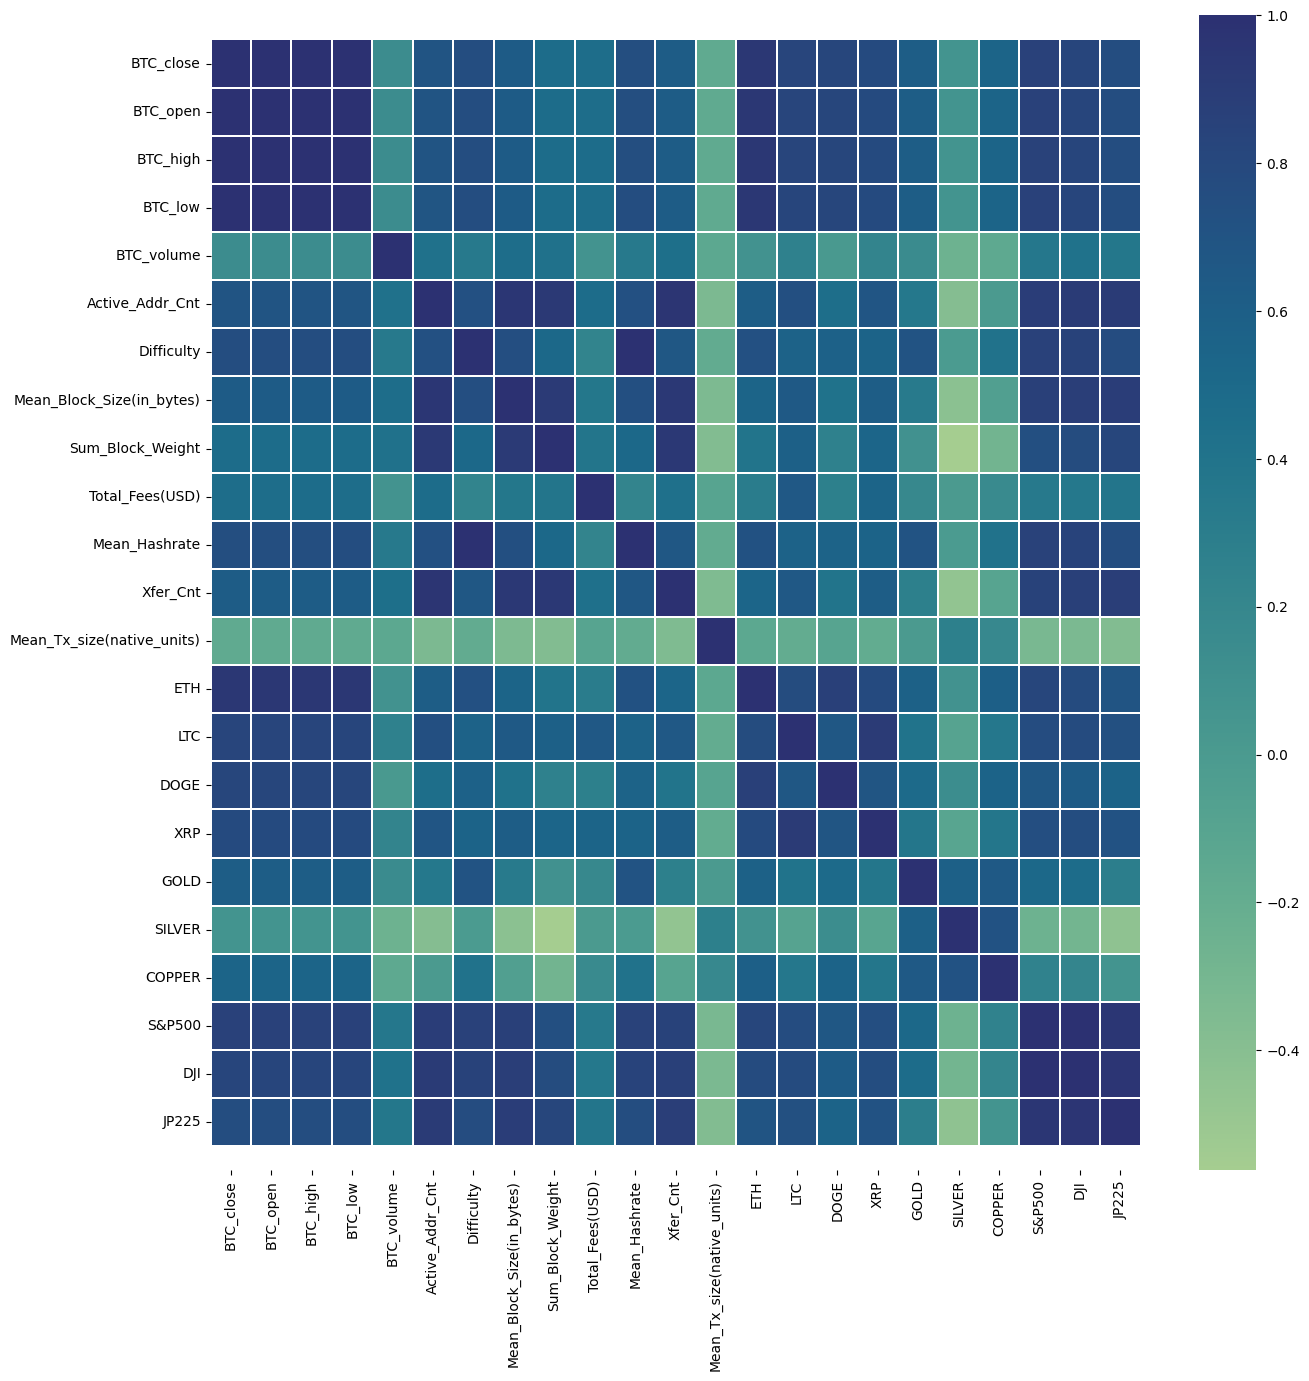

In [ ]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
# anot = True -> label all pixel, default = false
# ax = sns.heatmap(correlation_matrix)
ax = sns.heatmap(correlation_matrix, linewidths =.01, cmap = 'crest',linecolor='white',annot_kws={"size":8},ax=ax)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top - 0.5)
# plt.xlabel(fontweight = 'bold')
plt.show()

### **Normalization**

- a process that important in KNN - an algorithm that prediction based on calculating distance between data points.
- normalization: change all units and magnitudes to only one range to avoid bias to any features.
- In my programming, I choose MinMaxScaling method to normalize the data.

- formulas of Min Max Scaling: x_normalized = (x - min(x)) / (max(x) - min(x) 
> scale data to a fixed range, between 0 and 1

In [ ]:
scaler = MinMaxScaler()
df1 = df.drop("Date", axis = 1, inplace = False).drop("BTC_close", axis = 1, inplace = False)

X = df1.copy()

scaled = scaler.fit_transform(X)
display(scaled)

array([[0.00000000e+00, 0.00000000e+00, 1.50750208e-06, ...,
        9.67103544e-03, 9.10537245e-03, 5.06639467e-02],
       [0.00000000e+00, 0.00000000e+00, 1.50750208e-06, ...,
        5.96638342e-03, 5.02427105e-03, 4.97030443e-02],
       [0.00000000e+00, 0.00000000e+00, 1.50750208e-06, ...,
        1.23888471e-02, 1.25491164e-02, 4.71286432e-02],
       ...,
       [4.49991559e-01, 4.48827012e-01, 4.52642576e-01, ...,
        8.24257069e-01, 8.91312099e-01, 9.03304252e-01],
       [4.51253247e-01, 4.43342199e-01, 4.55398290e-01, ...,
        8.24257069e-01, 8.91312099e-01, 9.03304252e-01],
       [4.48685446e-01, 4.42745016e-01, 4.54279723e-01, ...,
        8.24257069e-01, 8.91312099e-01, 9.03304252e-01]])

In [ ]:
scaled = pd.DataFrame(scaled)
scaled['Date'] = df['Date']
scaled = scaled.values
scaled

array([[0.0, 0.0, 1.5075020841216315e-06, ..., 0.009105372449451421,
        0.05066394670123486, Timestamp('2010-07-20 00:00:00')],
       [0.0, 0.0, 1.5075020841216315e-06, ..., 0.005024271048085616,
        0.049703044279254316, Timestamp('2010-07-21 00:00:00')],
       [0.0, 0.0, 1.5075020841216315e-06, ..., 0.012549116426442408,
        0.04712864319956073, Timestamp('2010-07-22 00:00:00')],
       ...,
       [0.4499915591319827, 0.4488270124147528, 0.4526425757783611, ...,
        0.8913120985282225, 0.9033042515600782,
        Timestamp('2023-04-14 00:00:00')],
       [0.4512532467724787, 0.4433421992883078, 0.4553982895881354, ...,
        0.8913120985282225, 0.9033042515600782,
        Timestamp('2023-04-15 00:00:00')],
       [0.4486854458703424, 0.4427450156180924, 0.45427972304171715, ...,
        0.8913120985282225, 0.9033042515600782,
        Timestamp('2023-04-16 00:00:00')]], dtype=object)

### **Split data**

In [ ]:
scaled

array([[0.0, 0.0, 1.5075020841216315e-06, ..., 0.009105372449451421,
        0.05066394670123486, Timestamp('2010-07-20 00:00:00')],
       [0.0, 0.0, 1.5075020841216315e-06, ..., 0.005024271048085616,
        0.049703044279254316, Timestamp('2010-07-21 00:00:00')],
       [0.0, 0.0, 1.5075020841216315e-06, ..., 0.012549116426442408,
        0.04712864319956073, Timestamp('2010-07-22 00:00:00')],
       ...,
       [0.4499915591319827, 0.4488270124147528, 0.4526425757783611, ...,
        0.8913120985282225, 0.9033042515600782,
        Timestamp('2023-04-14 00:00:00')],
       [0.4512532467724787, 0.4433421992883078, 0.4553982895881354, ...,
        0.8913120985282225, 0.9033042515600782,
        Timestamp('2023-04-15 00:00:00')],
       [0.4486854458703424, 0.4427450156180924, 0.45427972304171715, ...,
        0.8913120985282225, 0.9033042515600782,
        Timestamp('2023-04-16 00:00:00')]], dtype=object)

In [ ]:
# 70/15/15
Y = pd.DataFrame()
Y['BTC_close'] = df['BTC_close']
Y['Date'] = df['Date']
Y = Y.values
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.15, random_state=0,shuffle=True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=15/85, random_state=0, shuffle=True)

Bỏ datetime

In [ ]:
def delete_datetime(df, column):
  date = pd.DataFrame(df)[column].values
  result = pd.DataFrame(df).drop(columns = {column}).values
  return date, result

X_train_date, X_train = delete_datetime(X_train, 22)
X_valid_date, X_valid = delete_datetime(X_valid, 22) 
X_test_date, X_test = delete_datetime(X_test, 22)

def delete_datetime(df, column):
  date = pd.DataFrame(df)[column].values
  result = pd.DataFrame(df).drop(columns = {column})[0].values
  return date, result

Y_train_date, Y_train = delete_datetime(Y_train, 1)
Y_vaid_date, Y_valid = delete_datetime(Y_valid, 1)
Y_test_date, Y_test = delete_datetime(Y_test, 1)

In [ ]:
print("x_train:",X_train.shape), print("y_train: ",Y_train.shape)
print("x_valid: ",X_valid.shape), print("y_valid: ",Y_valid.shape)
print("x_test: ",X_test.shape), print("y_test: ",Y_test.shape)

x_train: (3257, 22)
y_train:  (3257,)
x_valid:  (698, 22)
y_valid:  (698,)
x_test:  (699, 22)
y_test:  (699,)


(None, None)

### **plot**

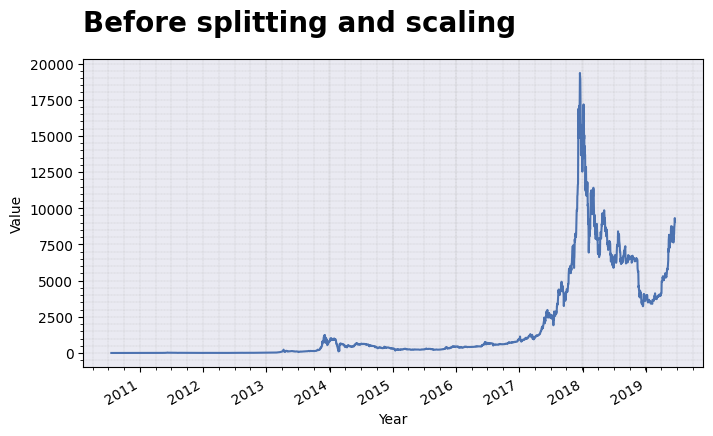

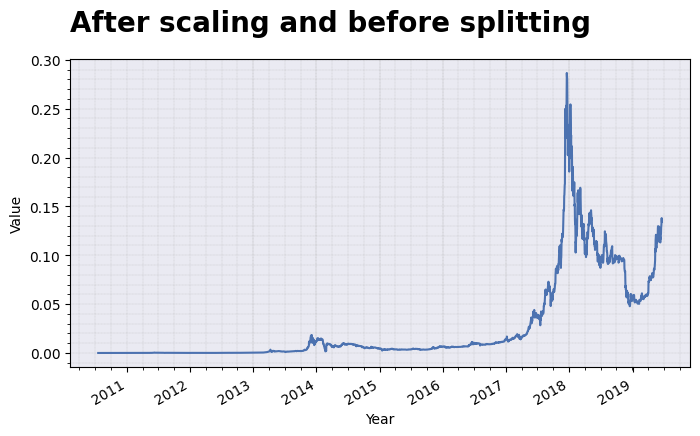

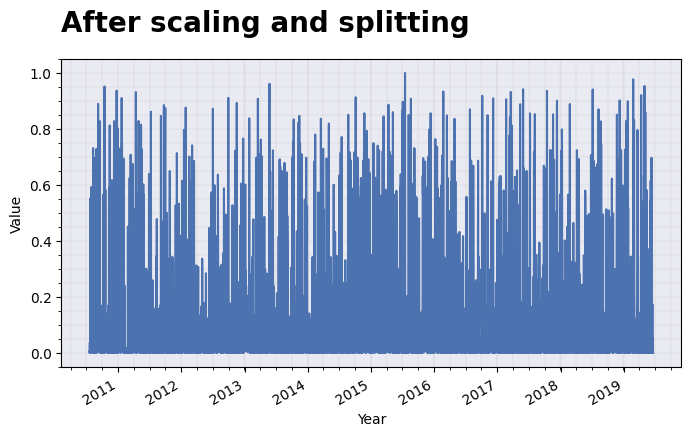

In [ ]:
# Before splitting and scaling
for i in range(len(scaled[0])):
    if i == 0:
      data = df.copy() #df

      # X axis is price_date
      D = df['Date'][:3257]

      # Y axis is price closing
      price_close = data['BTC_open'][:3257]

      fig, ax = plt.subplots(figsize = (8,4))
      
      # ax = plt.axes()
      ax.set_facecolor("#EAEAF2")
      # ax.scatter(D,df_monthly_mean[target])

      # Plotting the timeseries graph of given dataset
      plt.plot(D, price_close, color = '#4C72B0')

      # # Enabling both grid lines
      ax.grid(which = "both", linestyle = "dashed", linewidth = 0.2)
      ax.minorticks_on()


      # Giving title to the graph
      title = 'Before splitting and scaling'
      plt.title(title,loc = 'left',fontsize=20, fontweight = 'bold',pad=20)

      # rotating the x-axis tick labels at 30degree
      # towards right
      plt.xticks(rotation=30, ha='right')



      # Giving x and y label to the graph
      plt.xlabel('Year')
      plt.ylabel('Value')

# After scaling and before splitting
for i in range(len(scaled[0])):
    if i == 0:
      data = pd.DataFrame(scaled).iloc[:3257,:1].copy() #scaled

      # X axis is price_date
      D = df['Date'][:3257]

      # Y axis is price closing
      price_close = data[0][:3257]

      fig, ax = plt.subplots(figsize = (8,4))
      
      # ax = plt.axes()
      ax.set_facecolor("#EAEAF2")
      # ax.scatter(D,df_monthly_mean[target])

      # Plotting the timeseries graph of given dataset
      plt.plot(D, price_close, color = '#4C72B0')

      # # Enabling both grid lines
      ax.grid(which = "both", linestyle = "dashed", linewidth = 0.2)
      ax.minorticks_on()


      # Giving title to the graph
      title = 'After scaling and before splitting'
      plt.title(title,loc = 'left',fontsize=20, fontweight = 'bold',pad=20)

      # rotating the x-axis tick labels at 30degree
      # towards right
      plt.xticks(rotation=30, ha='right')



      # Giving x and y label to the graph
      plt.xlabel('Year')
      plt.ylabel('Value')


# After scaling and splitting
for i in range(len(scaled[0])):
    if i == 0:
      data = pd.DataFrame(X_train).copy() #X_train
      # X axis is price_date
      D = df['Date'][:3257]
      # Y axis is price closing
      price_close = data[i][:3257]
      fig, ax = plt.subplots(figsize = (8,4))
      # ax = plt.axes()
      ax.set_facecolor("#EAEAF2")
      # ax.scatter(D,df_monthly_mean[target]
      # Plotting the timeseries graph of given dataset
      plt.plot(D, price_close, color = '#4C72B0')
      # # Enabling both grid lines
      ax.grid(which = "both", linestyle = "dashed", linewidth = 0.2)
      ax.minorticks_on()
      # Giving title to the graph
      title = 'After scaling and splitting'
      plt.title(title,loc = 'left',fontsize=20, fontweight = 'bold',pad=20)
      # rotating the x-axis tick labels at 30degree
      # towards right
      plt.xticks(rotation=30, ha='right')
      # Giving x and y label to the graph
      plt.xlabel('Year')
      plt.ylabel('Value')



## **KNN**

### **Find the optimal k using function**

In [ ]:
# Elbow function to find the minimum MSE index
def elbow(X_train,Y_train,X_valid,Y_valid,p):
    error_rate = []
    for i in range(1,40):
        neighbors = KNN(n_neighbors=i,p=p)
        neighbors.fit(X_train, Y_train)
        prediction_knn = neighbors.predict(X_valid)
        result = mse(Y_valid,prediction_knn)
        error_rate.append(result)
    min_error = min(error_rate)
    optimal = error_rate.index(min_error)
    return optimal+1

In [ ]:
# p = 1 -> Manhattan distance
print("(L1)Optimal value for k is: ",elbow(X_train,Y_train,X_test,Y_test,1))
# p = 2 -> Euclidean distance
print("(L2)Optimal value for k is: ",elbow(X_train,Y_train,X_test,Y_test,2))

### **Find the optimal k using graph**

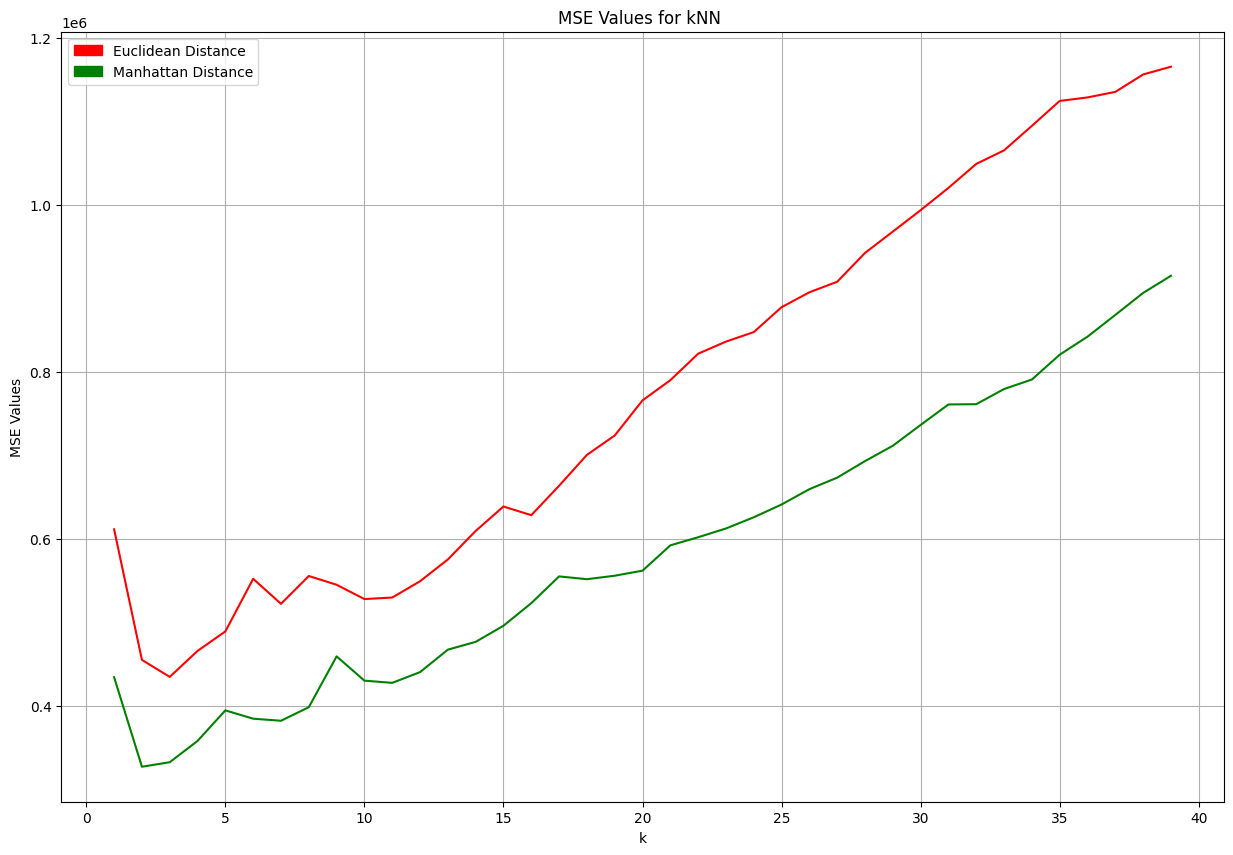

In [ ]:
# Elbow function to plot a graph.

def graph(x_train,y_train,X_valid,Y_valid,p):
    error_rate = []
    for i in range(1,40):
        neighbors = KNN(n_neighbors=i,p=p)
        neighbors.fit(X_train, Y_train)
        prediction_knn = neighbors.predict(X_valid)
        error_rate.append(mse(Y_valid,prediction_knn))
    return error_rate
K = range(1,40)
plt.figure(figsize=(15, 10))
plt.plot(K, graph(X_train,Y_train,X_valid,Y_valid,2) ,color='r')
plt.plot(K, graph(X_train,Y_train,X_valid,Y_valid,1) ,color='g')
plt.xlabel('k')
plt.ylabel('MSE Values')
plt.title('MSE Values for kNN ')
red_patch = mpatches.Patch(color='r', label='Euclidean Distance')
green_patch = mpatches.Patch(color='g', label='Manhattan Distance')
plt.legend(handles=[red_patch,green_patch])
plt.grid()
plt.show()

### **Manhattan distance**

For Manhattan distance our value is (n_neighbors=1,p=1):  415334.90370529337


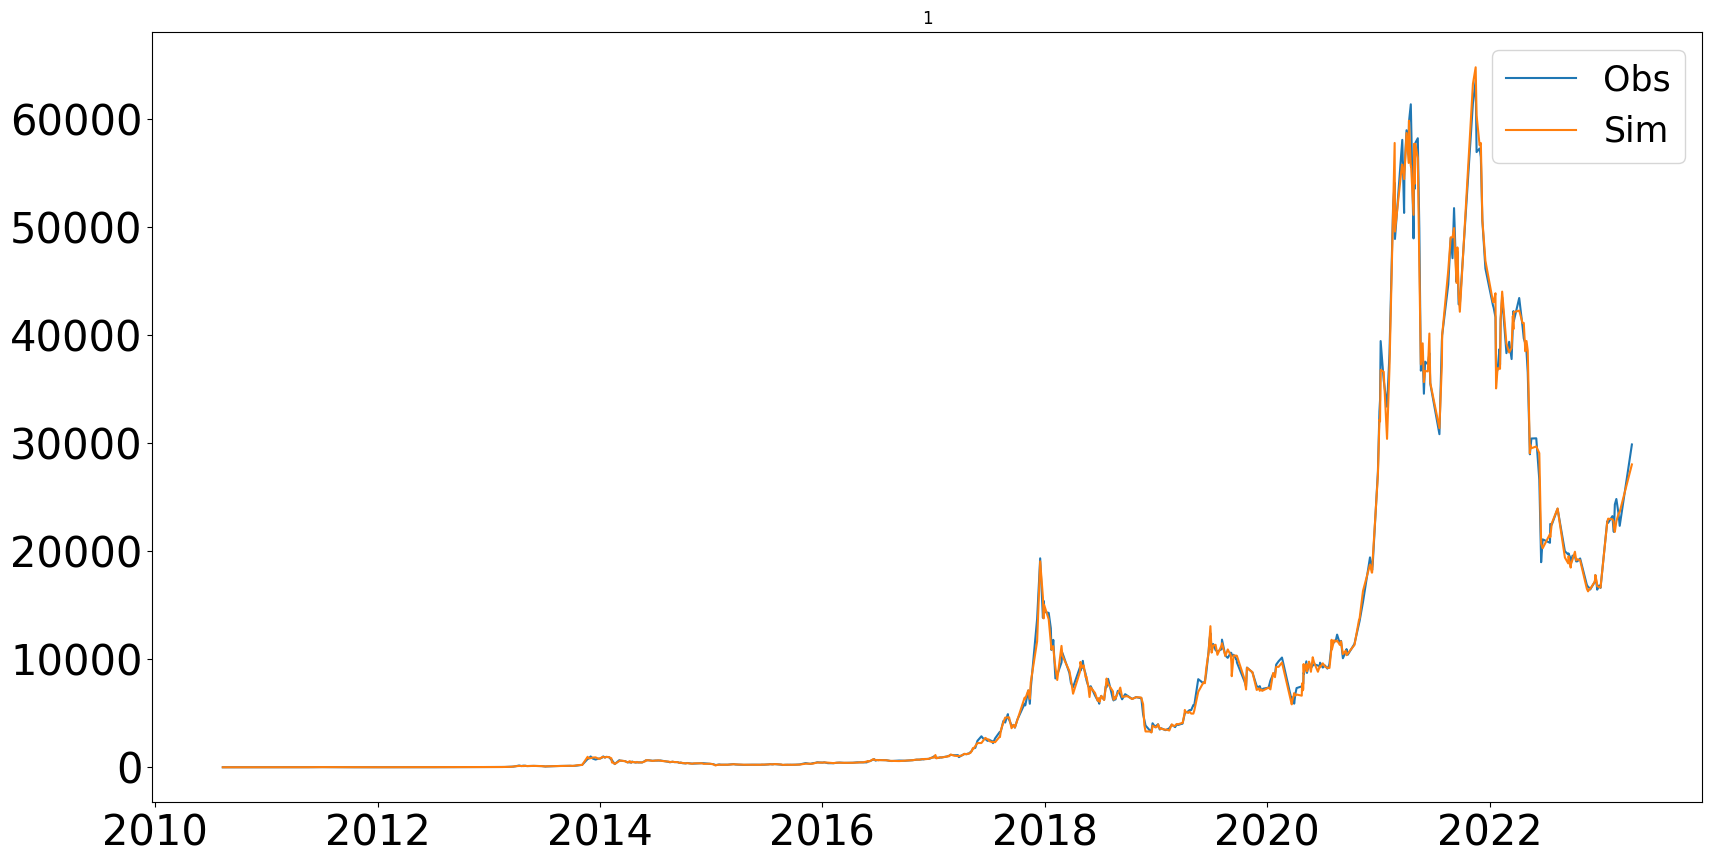

For Manhattan distance our value is (n_neighbors=2,p=1):  342622.54458869825


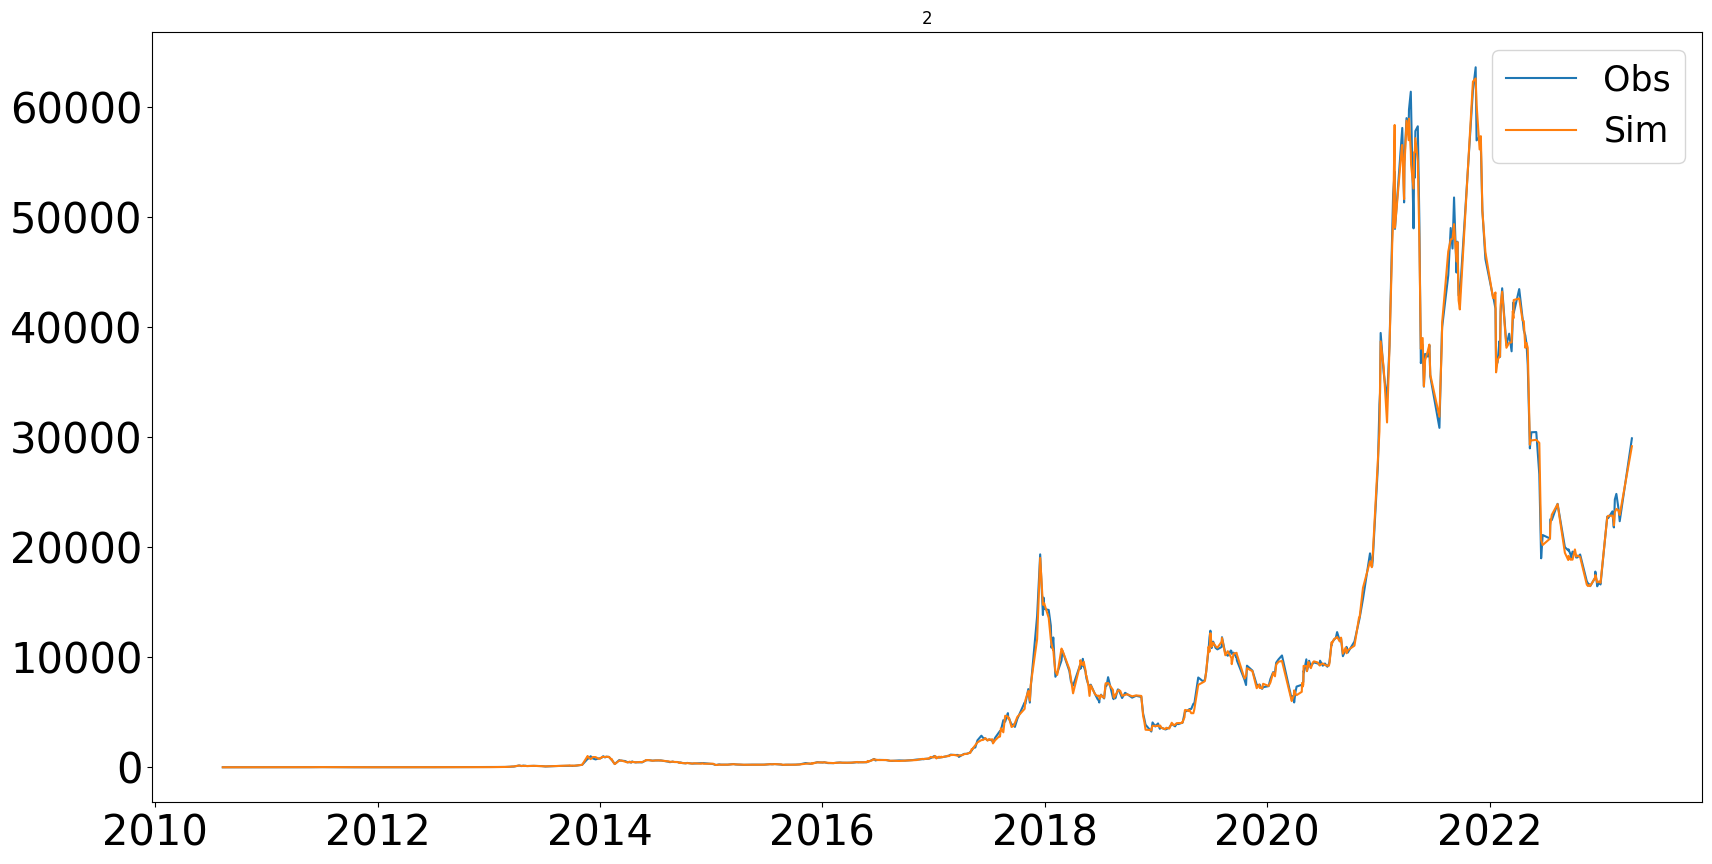

For Manhattan distance our value is (n_neighbors=3,p=1):  380752.46636782715


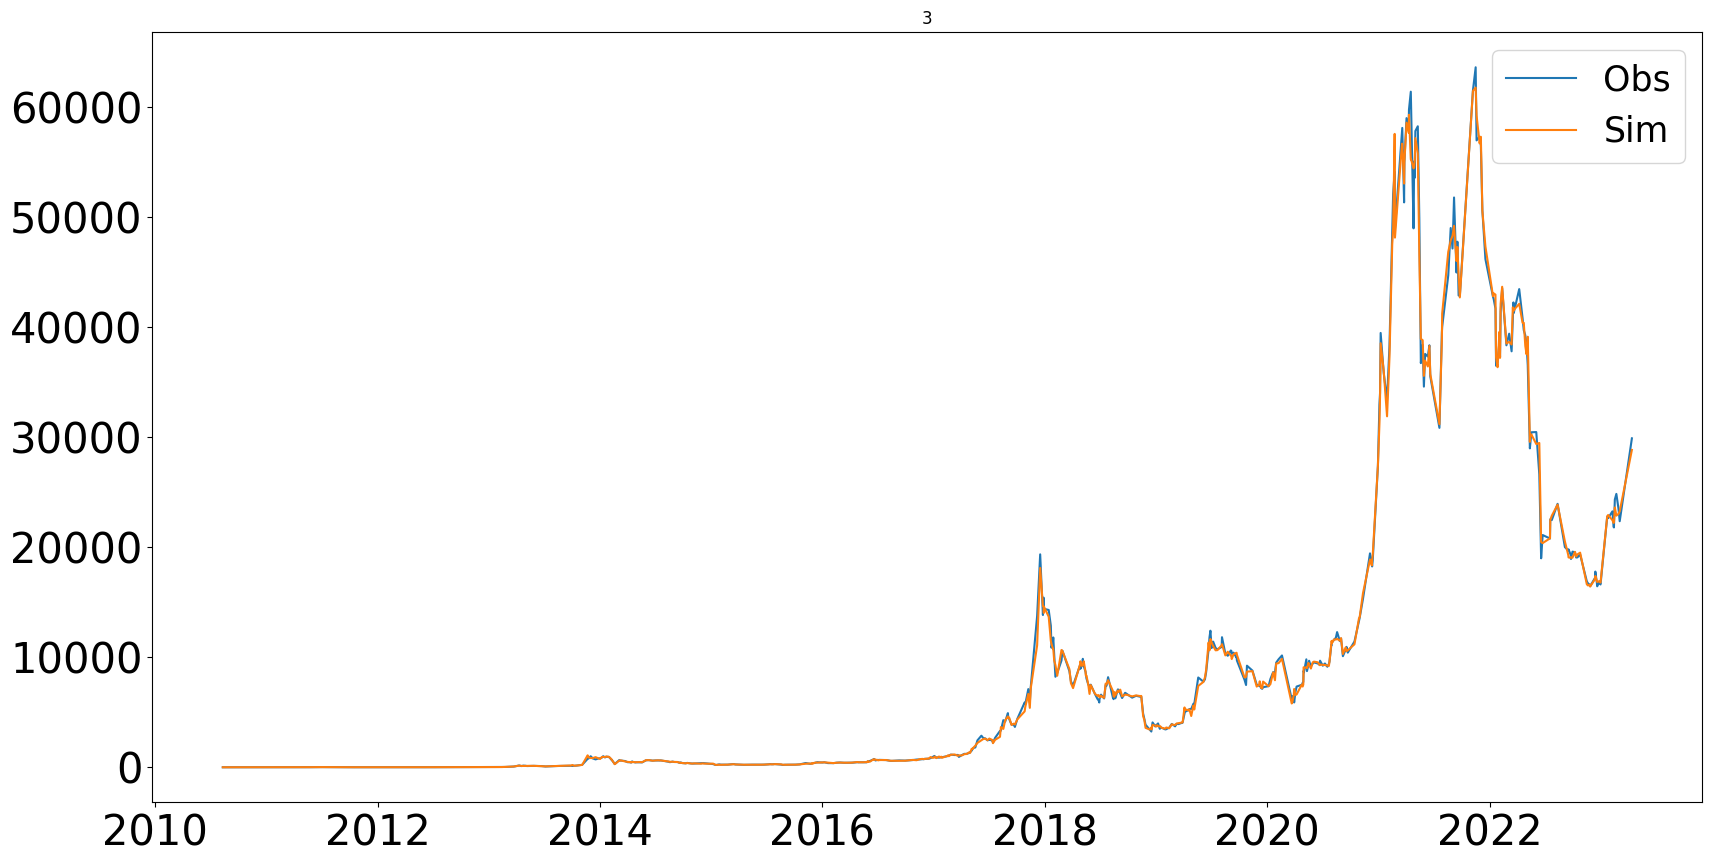

For Manhattan distance our value is (n_neighbors=4,p=1):  358144.26343347644


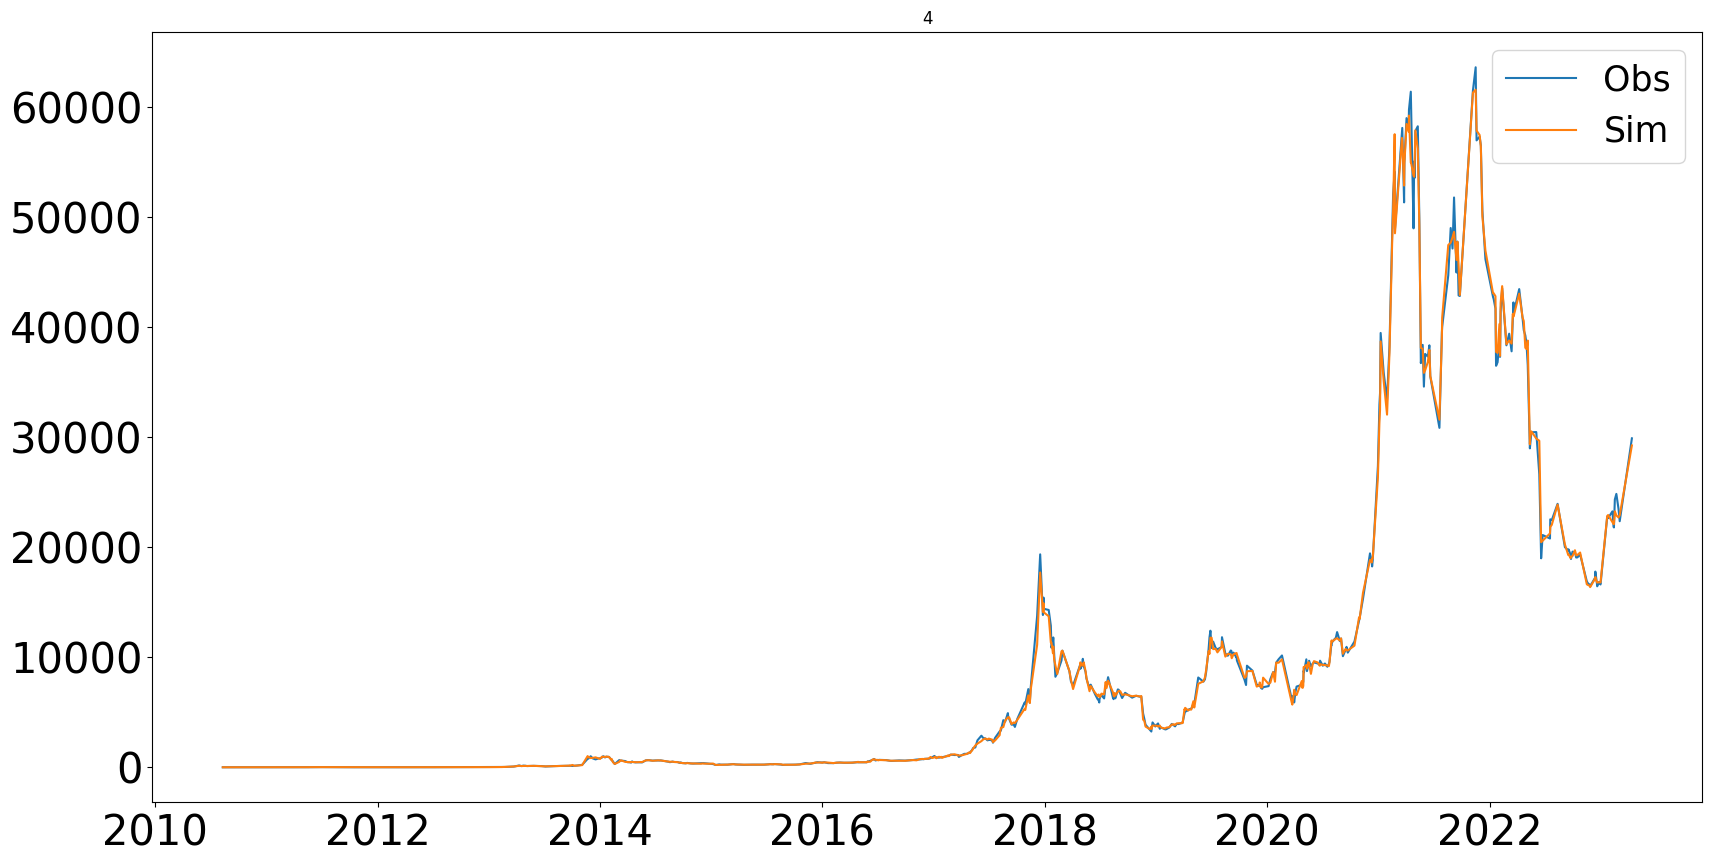

For Manhattan distance our value is (n_neighbors=5,p=1):  319363.85317310446


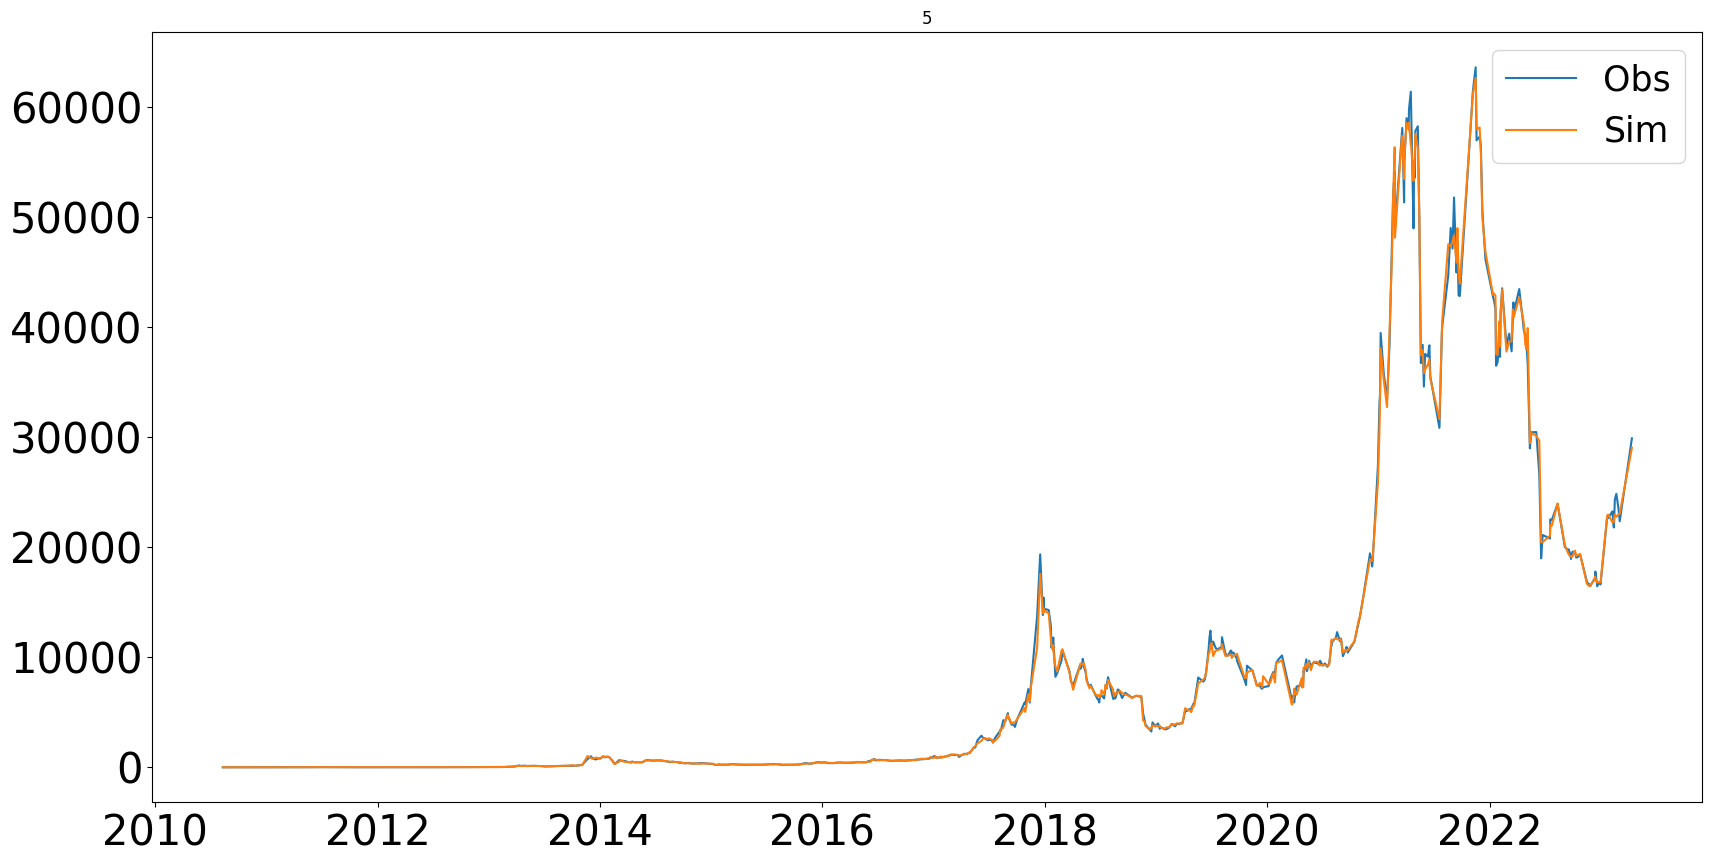

For Manhattan distance our value is (n_neighbors=6,p=1):  318195.5815661264


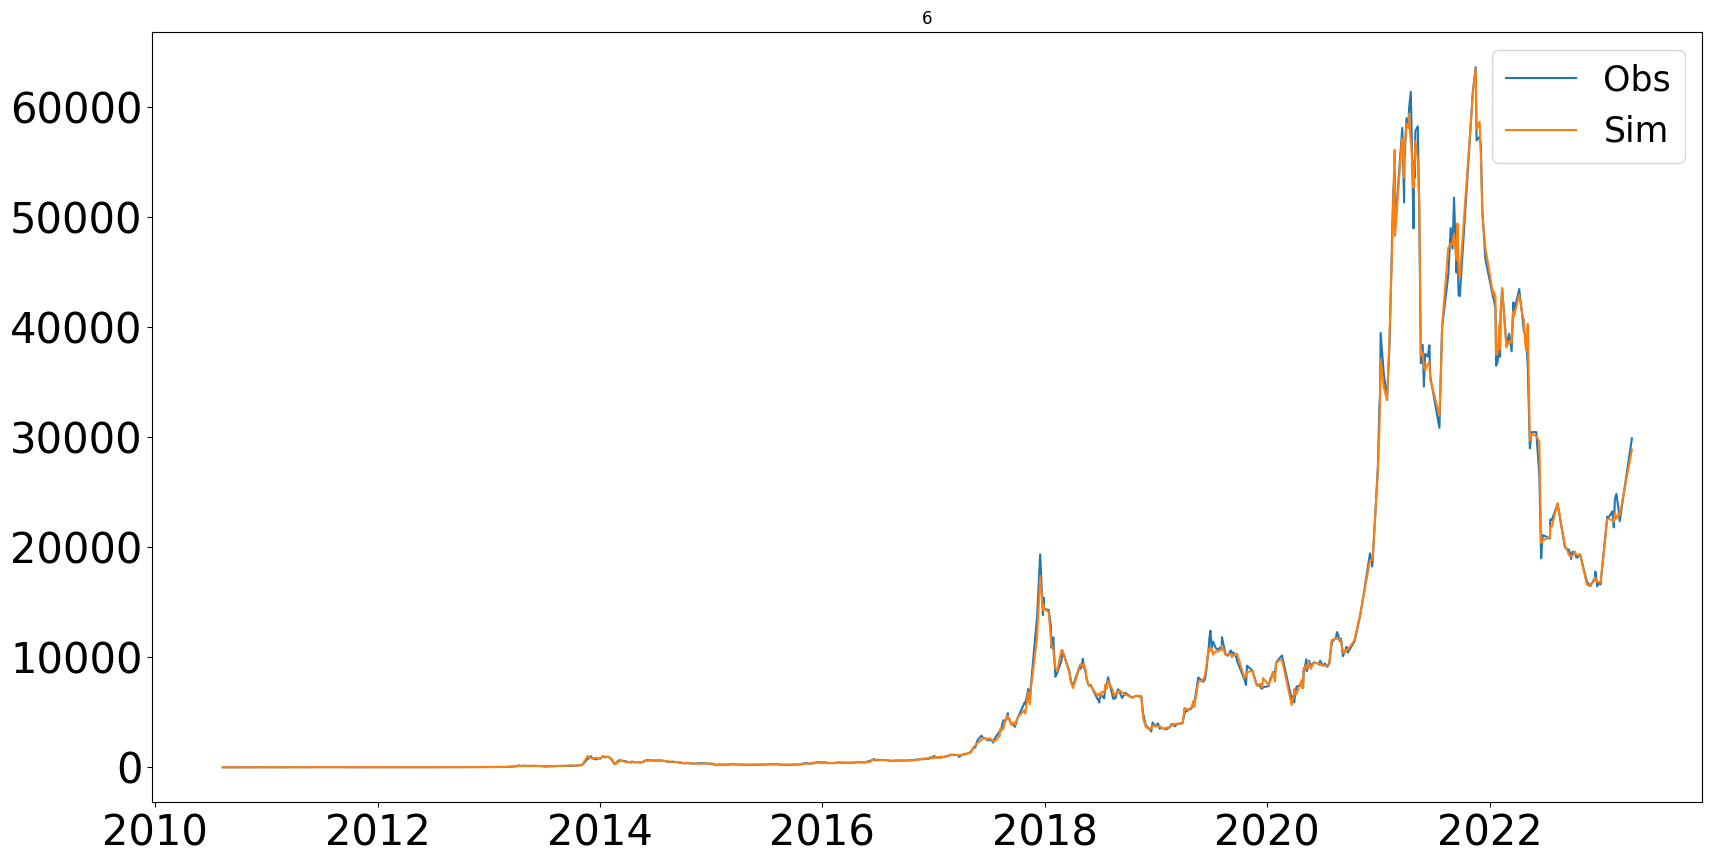

In [ ]:
# manhattan
for k in range(1,7):
    p = 1
    neighbors = KNN(n_neighbors=k,p=1)
    neighbors.fit(X_train, Y_train)
    prediction_knn = neighbors.predict(X_test)
    result_manhattan = mse(Y_test,prediction_knn)
    print("For Manhattan distance our value is (n_neighbors=%s,p=)%s: "%(k,p),result_manhattan)
  
    # plot
    
    D = pd.DataFrame()
    D['Date'] = X_test_date
    D['Obs'] = Y_test
    D['Sim'] = prediction_knn
    D = D.sort_values('Date').reset_index().drop(columns = 'index')

    fig = plt.figure(figsize = (20,10))
    plt.plot(D['Date'], D['Obs'].values, label = 'Obs')
    plt.plot(D['Date'], D['Sim'] , label = 'Sim')
    plt.title('%s'%k)
    plt.legend(fontsize=25)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize =30)
    # plt.savefig('/content/drive/MyDrive/Tài liệu học tập/Machine learning/Project/'+str(1)+str(k)+'.png')
    plt.show()

    # save fig
    from datetime import datetime
    with open('/content/drive/MyDrive/Tài liệu học tập/Machine learning/Project/result.txt','a') as f:
      # datetime object containing current date and time
      now = datetime.now()
      # dd/mm/YY H:M:S
      dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
      p = 'Manhattan'
      f.write(dt_string+',')
      f.write(p+',')
      f.write(str(k)+',')
      f.write(str(result_manhattan))
      f.write('\n')

### **Euclide distance**

For Manhattan distance our value is (n_neighbors=1,p=Euclide):  523105.72343347635


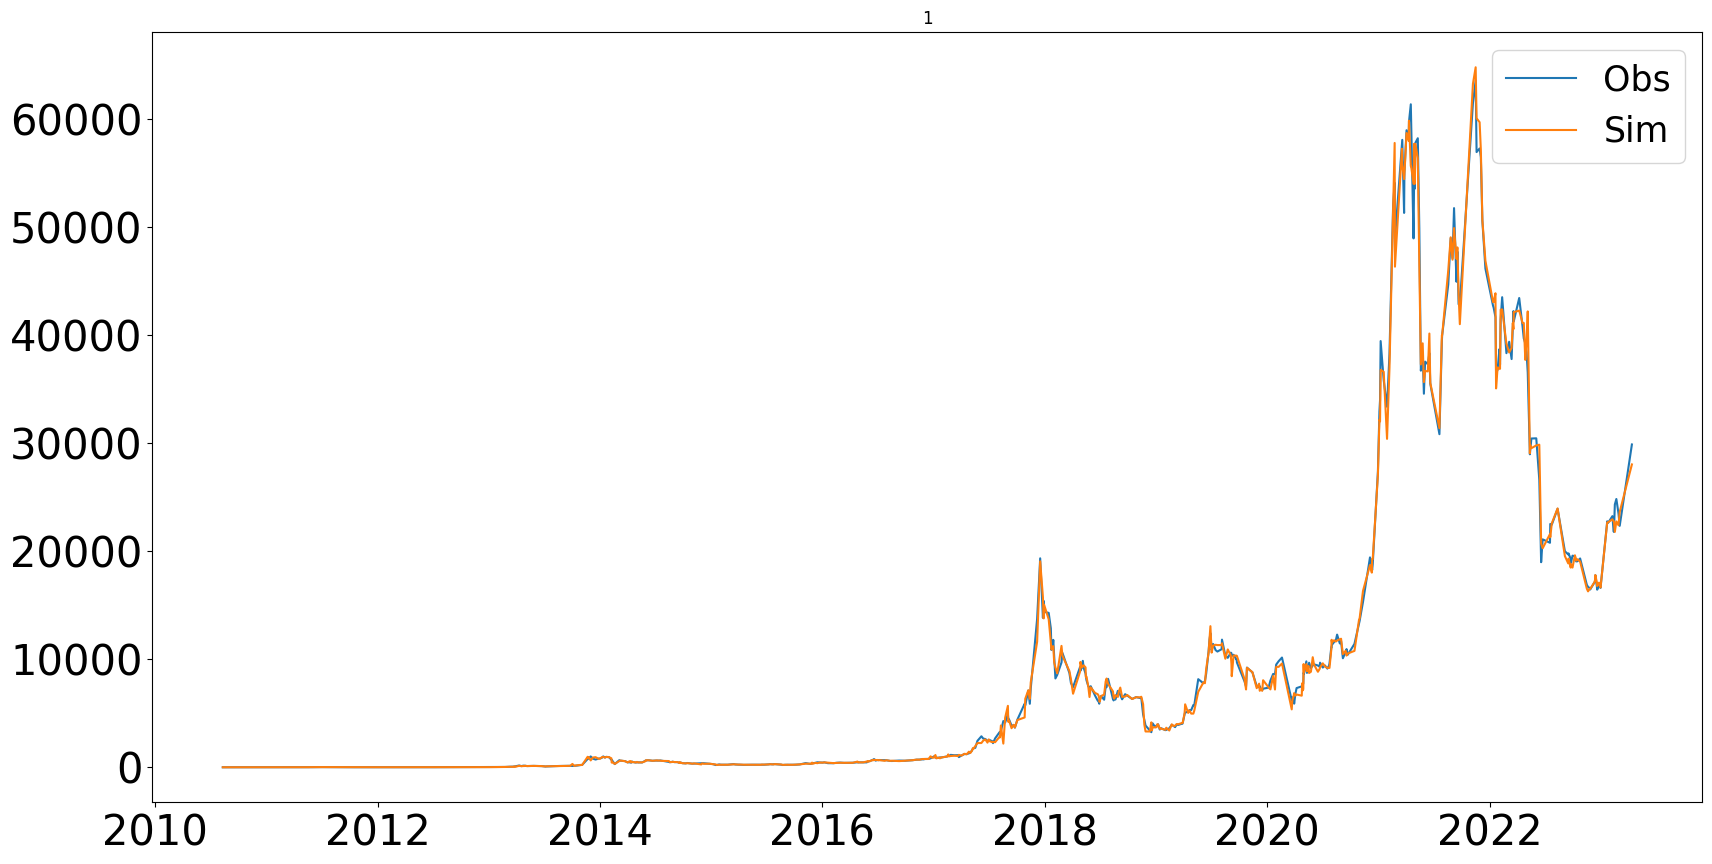

For Manhattan distance our value is (n_neighbors=2,p=Euclide):  515804.74514306156


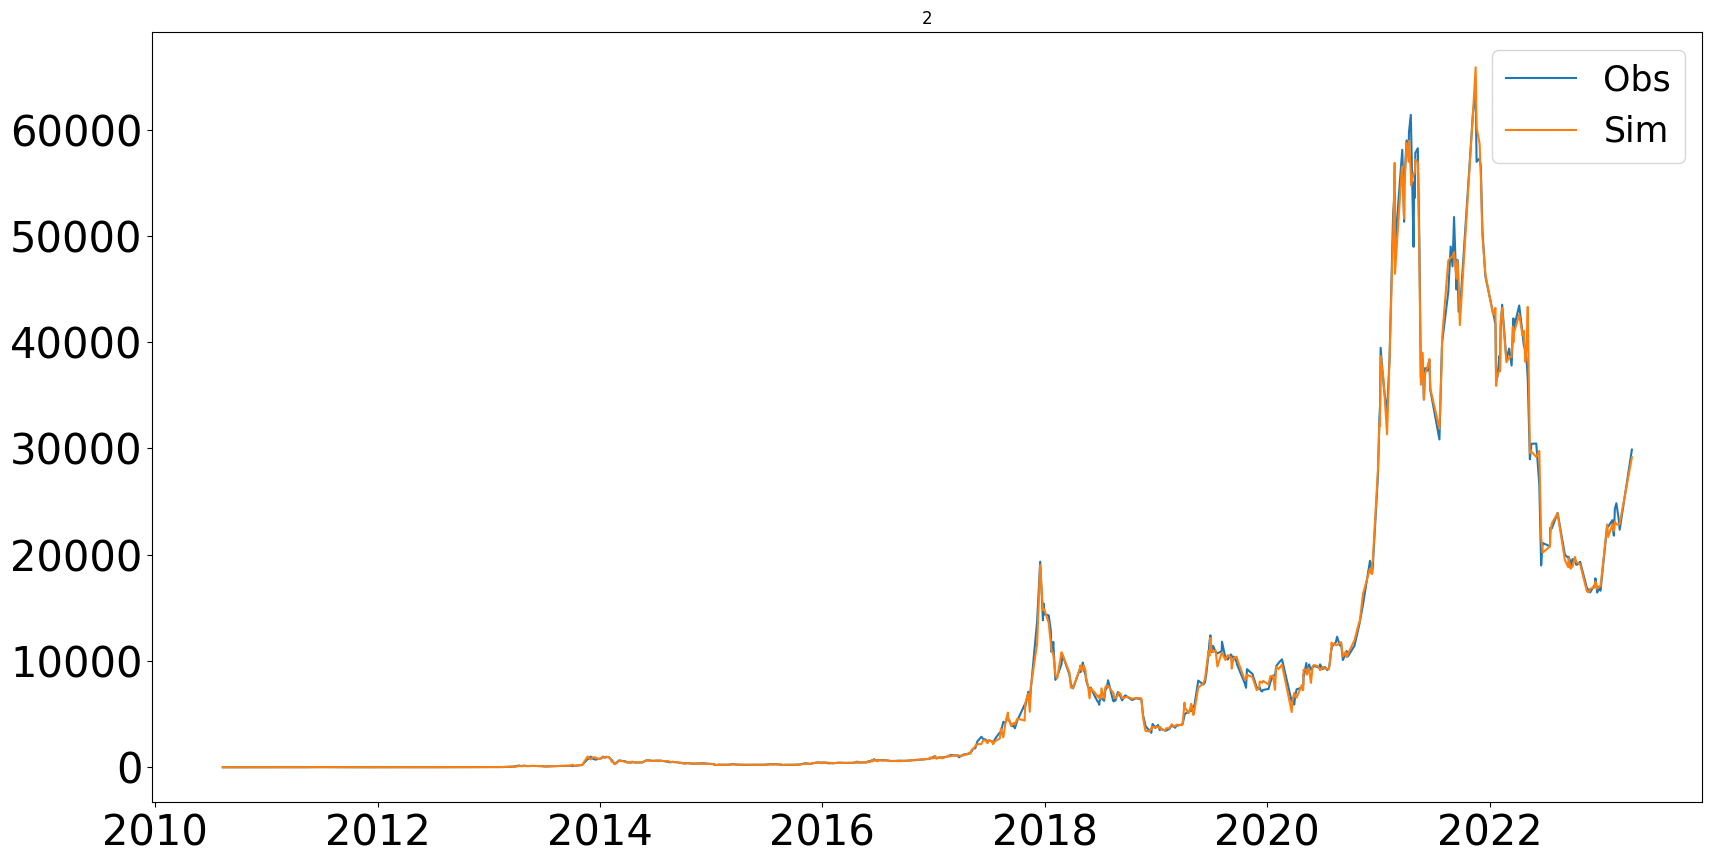

For Manhattan distance our value is (n_neighbors=3,p=Euclide):  523651.2035336196


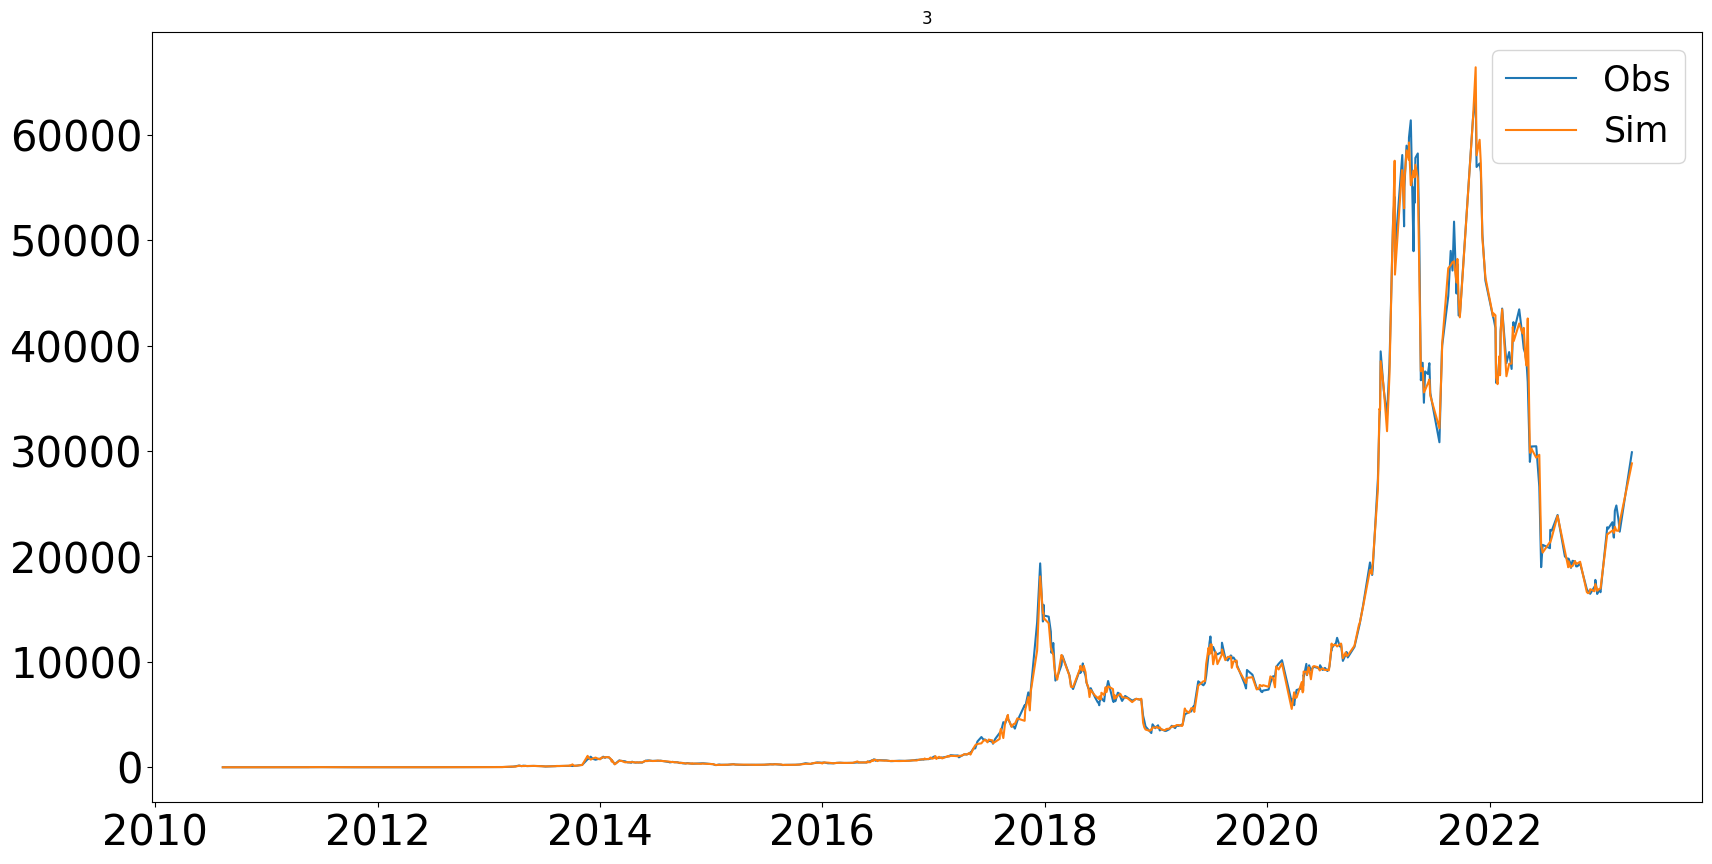

For Manhattan distance our value is (n_neighbors=4,p=Euclide):  488351.28318311874


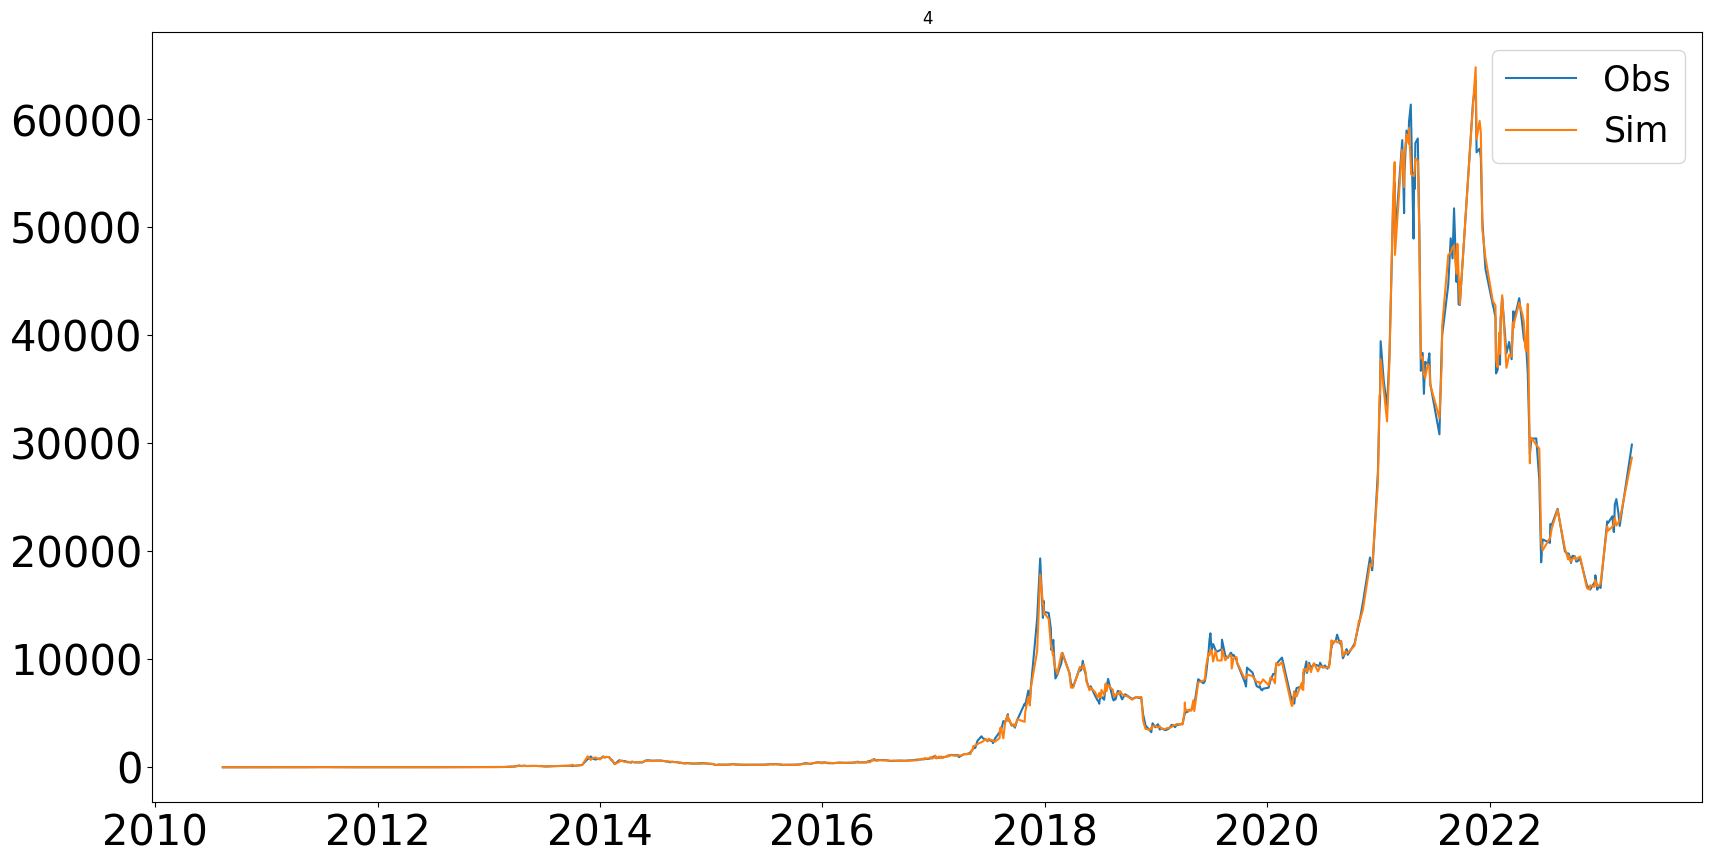

For Manhattan distance our value is (n_neighbors=5,p=Euclide):  493276.4914712447


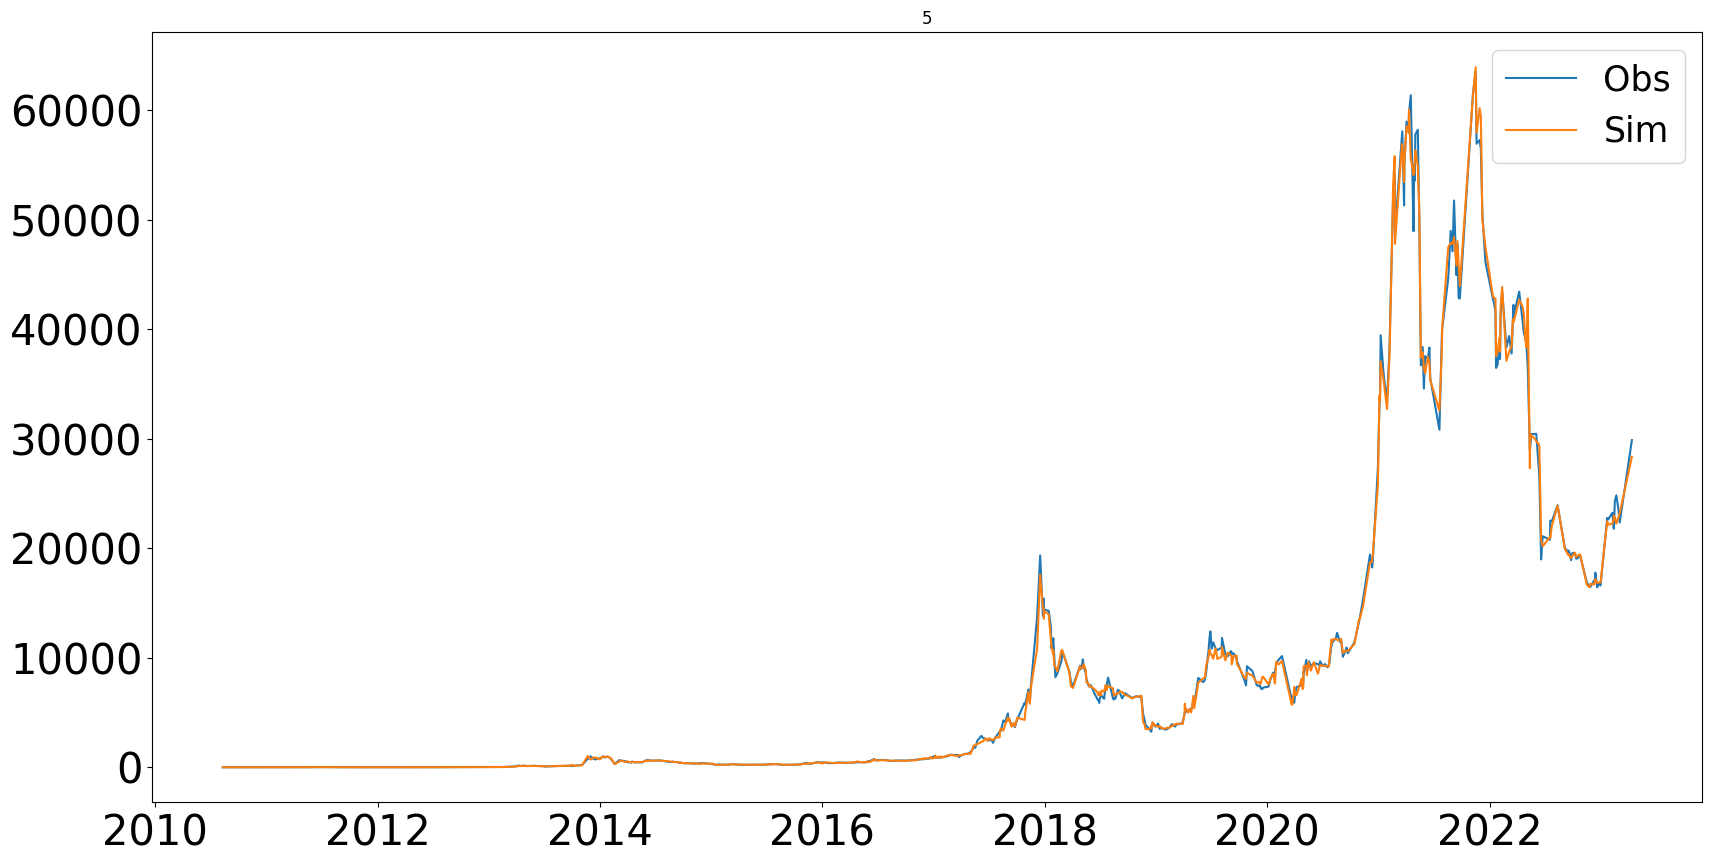

For Manhattan distance our value is (n_neighbors=6,p=Euclide):  448799.6023259417


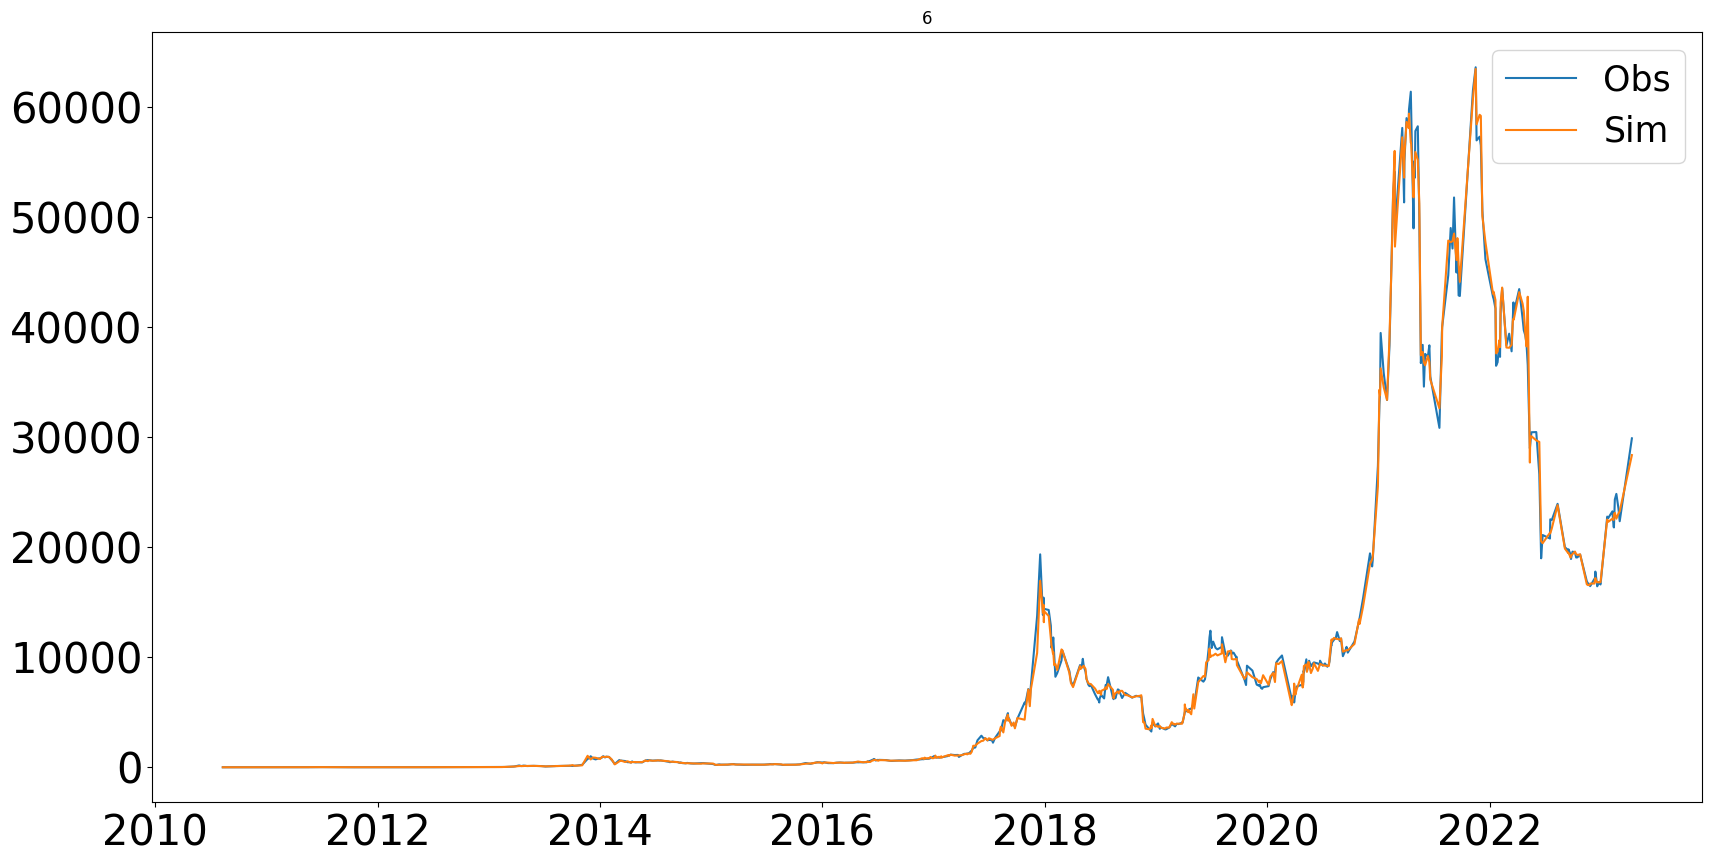

In [ ]:
# euclide
for k in range(1,7):
    p = 2
    neighbors = KNN(n_neighbors=k,p=p)
    neighbors.fit(X_train, Y_train)
    prediction_knn = neighbors.predict(X_test)
    result_euclide = mse(Y_test,prediction_knn)
    print("For Manhattan distance our value is (n_neighbors=%s,p=%s): "%(k,p),result_euclide)
    
    
    # plot
    # D = df['Date'][:3257]
    
    D = pd.DataFrame()
    D['Date'] = X_test_date
    D['Obs'] = Y_test
    D['Sim'] = prediction_knn
    D = D.sort_values('Date').reset_index().drop(columns = 'index')

    fig = plt.figure(figsize = (20,10))
    plt.plot(D['Date'], D['Obs'].values, label = 'Obs')
    plt.plot(D['Date'], D['Sim'] , label = 'Sim')
    plt.title('%s'%k)
    plt.legend(fontsize=25)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize =30)
    # plt.savefig('/content/drive/MyDrive/Tài liệu học tập/Machine learning/Project/'+str(2)+str(k)+'.png')
    plt.show()

    from datetime import datetime
    with open('/content/drive/MyDrive/Tài liệu học tập/Machine learning/Project/result.txt','a') as f:
      # datetime object containing current date and time
      now = datetime.now()
      # dd/mm/YY H:M:S
      dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
      p = 'Euclide'
      f.write(dt_string+',')
      f.write(p+',')
      f.write(str(k)+',')
      f.write(str(result_euclide))
      f.write('\n')